In [ ]:
# IMPORTAR LIBRERIAS

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import spearmanr, pearsonr
import warnings
warnings.filterwarnings('ignore')
# Configuració estètica
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from scipy.stats import spearmanr, pearsonr, shapiro
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from scipy.stats import shapiro
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import het_breuschpagan
import numpy as np
# Configuración de estilo
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("✅ Librerías importadas correctamente")


# Si el archivo usa otro separador como punto y coma
df = pd.read_csv(
    r"C:\Users\#\Documents\GitHub\Proyectos\MARKETING\Data\digital_marketing_campaign_dataset.csv",
    sep=',',  # o el delimitador que corresponda
    engine='python'
)

# Mostrar las primeras filas para verificar
print(df.head())

print("Tipos de datos por columna:")
print(df.dtypes)

# Información detallada
print("\nInformación completa del dataset:")
print(df.info())

# Estadísticas descriptivas por tipo de dato
print("\nResumen de datos numéricos:")
print(df.describe())

df_mar = df.copy()


✅ Librerías importadas correctamente
   CustomerID  Age  Gender  Income CampaignChannel CampaignType      AdSpend  \
0        8000   56  Female  136912    Social Media    Awareness  6497.870068   
1        8001   69    Male   41760           Email    Retention  3898.668606   
2        8002   46  Female   88456             PPC    Awareness  1546.429596   
3        8003   32  Female   44085             PPC   Conversion   539.525936   
4        8004   60  Female   83964             PPC   Conversion  1678.043573   

   ClickThroughRate  ConversionRate  WebsiteVisits  PagesPerVisit  TimeOnSite  \
0          0.043919        0.088031              0       2.399017    7.396803   
1          0.155725        0.182725             42       2.917138    5.352549   
2          0.277490        0.076423              2       8.223619   13.794901   
3          0.137611        0.088004             47       4.540939   14.688363   
4          0.252851        0.109940              0       2.046847   13.993370

In [18]:
# ANÁLISIS EXPLORATORIO COMPLETO

print("=" * 50)
print("ANÁLISIS EXPLORATORIO - MARKETING DIGITAL")
print("=" * 50)

# 1. VERIFICACIÓN DE VALORES NULOS
print("\n🔍 1. VALORES NULOS POR COLUMNA:")
print(df.isnull().sum())

# 2. ANÁLISIS DE DUPLICADOS
print(f"\n🔍 2. REGISTROS DUPLICADOS: {df.duplicated().sum()}")

# 3. ANÁLISIS DE VARIABLES CATEGÓRICAS
print("\n🔍 3. DISTRIBUCIÓN DE VARIABLES CATEGÓRICAS:")
categorical_cols = ['Gender', 'CampaignChannel', 'CampaignType', 'AdvertisingPlatform', 'AdvertisingTool']

for col in categorical_cols:
    print(f"\n{col}:")
    print(df[col].value_counts())
    print(f"Valores únicos: {df[col].nunique()}")

# 4. ANÁLISIS DE LA VARIABLE TARGET
print("\n🔍 4. DISTRIBUCIÓN DE LA VARIABLE TARGET (Conversion):")
conversion_dist = df['Conversion'].value_counts(normalize=True) * 100
print(conversion_dist)
print(f"\nTasa de conversión general: {conversion_dist[1]:.2f}%")

# 5. ESTADÍSTICAS POR GÉNERO
print("\n🔍 5. ESTADÍSTICAS POR GÉNERO:")
print(df.groupby('Gender').agg({
    'Age': 'mean',
    'Income': 'mean', 
    'Conversion': 'mean',
    'AdSpend': 'mean'
}).round(2))

# 6. CORRELACIONES INICIALES (solo numéricas)
print("\n🔍 6. CORRELACIONES CON CONVERSIÓN:")
numeric_cols = df.select_dtypes(include=[np.number]).columns
correlation_with_target = df[numeric_cols].corr()['Conversion'].sort_values(ascending=False)
print(correlation_with_target)

ANÁLISIS EXPLORATORIO - MARKETING DIGITAL

🔍 1. VALORES NULOS POR COLUMNA:
CustomerID             0
Age                    0
Gender                 0
Income                 0
CampaignChannel        0
CampaignType           0
AdSpend                0
ClickThroughRate       0
ConversionRate         0
WebsiteVisits          0
PagesPerVisit          0
TimeOnSite             0
SocialShares           0
EmailOpens             0
EmailClicks            0
PreviousPurchases      0
LoyaltyPoints          0
AdvertisingPlatform    0
AdvertisingTool        0
Conversion             0
dtype: int64

🔍 2. REGISTROS DUPLICADOS: 0

🔍 3. DISTRIBUCIÓN DE VARIABLES CATEGÓRICAS:

Gender:
Gender
Female    4839
Male      3161
Name: count, dtype: int64
Valores únicos: 2

CampaignChannel:
CampaignChannel
Referral        1719
PPC             1655
Email           1557
SEO             1550
Social Media    1519
Name: count, dtype: int64
Valores únicos: 5

CampaignType:
CampaignType
Conversion       2077
Awareness     

CORRECCIÓN: MANTENIENDO CUSTOMERID
✅ Columnas eliminadas (solo las constantes): ['AdvertisingPlatform', 'AdvertisingTool']
✅ CustomerID conservado - Total IDs únicos: 8000
📊 Dataset actual: 8000 filas, 18 columnas
🔍 CustomerID - Valores únicos: 8000
🔍 CustomerID - Rango: 8000 a 15999

📈 Análisis de distribución de CustomerID:


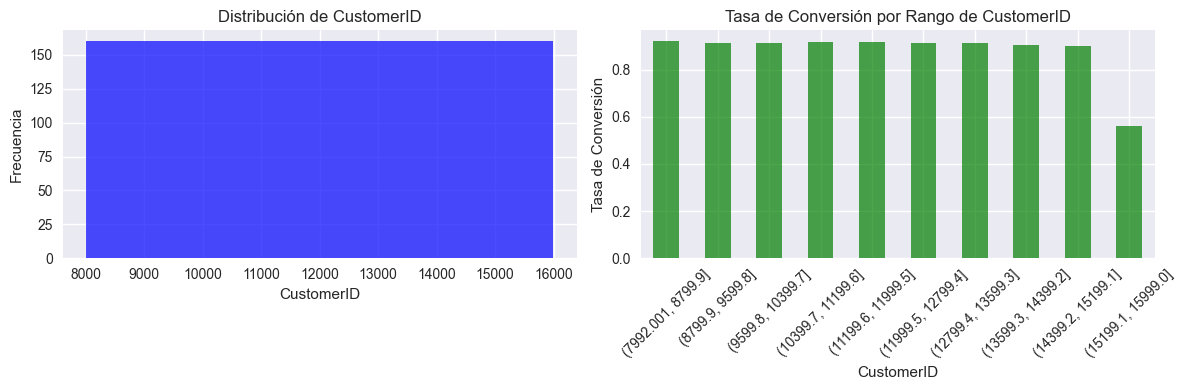


🔍 ¿CustomerID es secuencial?: True


In [20]:
print("=" * 60)
print("CORRECCIÓN: MANTENIENDO CUSTOMERID")
print("=" * 60)

# SOLO eliminamos las columnas realmente constantes
columns_to_drop = ['AdvertisingPlatform', 'AdvertisingTool']
df_clean = df_mar.drop(columns=columns_to_drop, errors='ignore')
print(f"✅ Columnas eliminadas (solo las constantes): {columns_to_drop}")
print(f"✅ CustomerID conservado - Total IDs únicos: {df_clean['CustomerID'].nunique()}")
print(f"📊 Dataset actual: {df_clean.shape[0]} filas, {df_clean.shape[1]} columnas")

# Verificar que CustomerID esté completo
print(f"🔍 CustomerID - Valores únicos: {df_clean['CustomerID'].nunique()}")
print(f"🔍 CustomerID - Rango: {df_clean['CustomerID'].min()} a {df_clean['CustomerID'].max()}")

# ANÁLISIS DE PATRONES EN CUSTOMERID (podría ser secuencial o tener información temporal)
print("\n📈 Análisis de distribución de CustomerID:")
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.hist(df_clean['CustomerID'], bins=50, alpha=0.7, color='blue')
plt.title('Distribución de CustomerID')
plt.xlabel('CustomerID')
plt.ylabel('Frecuencia')

plt.subplot(1, 2, 2)
# Verificar si hay relación entre CustomerID y conversión (podría indicar tendencia temporal)
conversion_by_id_bin = pd.cut(df_clean['CustomerID'], bins=10)
conversion_rate_by_bin = df_clean.groupby(conversion_by_id_bin)['Conversion'].mean()
conversion_rate_by_bin.plot(kind='bar', color='green', alpha=0.7)
plt.title('Tasa de Conversión por Rango de CustomerID')
plt.xticks(rotation=45)
plt.ylabel('Tasa de Conversión')

plt.tight_layout()
plt.show()

# Verificar si CustomerID es secuencial (podría representar tiempo)
print(f"\n🔍 ¿CustomerID es secuencial?: {df_clean['CustomerID'].is_monotonic_increasing}")

In [22]:
# ANÁLISIS DE COMPORTAMIENTO POR "ANTIGÜEDAD" (si CustomerID es secuencial)
if df_clean['CustomerID'].is_monotonic_increasing:
    print("\n🎯 CustomerID parece ser secuencial - Podría representar:")
    print("   - Orden de registro")
    print("   - Antigüedad del cliente")
    print("   - Tendencia temporal")
    
    # Crear variable de "cohorte" basada en CustomerID
    df_clean['CohortGroup'] = pd.cut(df_clean['CustomerID'], 
                                    bins=4, 
                                    labels=['Cohorte 1 (Antiguos)', 
                                           'Cohorte 2', 
                                           'Cohorte 3', 
                                           'Cohorte 4 (Nuevos)'])
    
    print("\n📊 Comportamiento por Cohorte (basado en CustomerID):")
    cohort_analysis = df_clean.groupby('CohortGroup').agg({
        'Conversion': 'mean',
        'PreviousPurchases': 'mean',
        'LoyaltyPoints': 'mean',
        'Age': 'mean'
    }).round(2)
    print(cohort_analysis)
else:
    print("\n📊 CustomerID no es secuencial - Probablemente IDs aleatorios")

# Conservar el dataset limpio con CustomerID
print(f"\n✅ DATASET FINAL PARA ANÁLISIS:")
print(f"   - Filas: {df_clean.shape[0]}")
print(f"   - Columnas: {df_clean.shape[1]}")
print(f"   - CustomerID conservado para análisis futuro")
print(f"   - Columnas eliminadas: {columns_to_drop}")


🎯 CustomerID parece ser secuencial - Podría representar:
   - Orden de registro
   - Antigüedad del cliente
   - Tendencia temporal

📊 Comportamiento por Cohorte (basado en CustomerID):
                      Conversion  PreviousPurchases  LoyaltyPoints    Age
CohortGroup                                                              
Cohorte 1 (Antiguos)        0.91               4.54        2540.90  43.81
Cohorte 2                   0.92               4.48        2517.76  43.59
Cohorte 3                   0.91               4.42        2460.37  43.64
Cohorte 4 (Nuevos)          0.77               4.50        2442.04  43.47

✅ DATASET FINAL PARA ANÁLISIS:
   - Filas: 8000
   - Columnas: 19
   - CustomerID conservado para análisis futuro
   - Columnas eliminadas: ['AdvertisingPlatform', 'AdvertisingTool']
